In [ ]:
#Carl Jia Hua Xi, Python 3

In [125]:
# To write a Python 2/3 compatible codebase, the first step is to add this line to the top of each module
from __future__ import division, print_function, unicode_literals
from IPython.display import Image
from sklearn import linear_model, neighbors, datasets, metrics, tree        # The sklearn.linear_model module implements generalized linear models. LR is part of this module
from sklearn.linear_model import LogisticRegression # Logistic regression classifier class
from matplotlib.colors import ListedColormap # Learn more about matplotlib.colors here https://matplotlib.org/3.1.1/api/colors_api.html
import matplotlib.pyplot as plt #pyplot is matplotlib's plotting framework https://matplotlib.org/users/pyplot_tutorial.html
import matplotlib
import scipy as sp # sp is an alias pointing to scipy
import numpy as np
import pandas as pd # pd is an alias point to pandas
import warnings
import sklearn
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder 
# StandardScaler Standardize features by removing the mean and scaling to unit variance
# LabelEncoder Encode labels with value between 0 and n_classes-1
# Cross_val_score Evaluate a score by cross-validation

# The sklearn.metrics module includes score functions, performance metrics and pairwise metrics 
# and distance computations.
# https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
#----------
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, cohen_kappa_score,  roc_curve, auc
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
# If you don't have graphviz package, you need to install it https://anaconda.org/anaconda/graphviz
# How to install Graphviz with Anaconda 1
# conda install -c anaconda graphviz 
!pip install graphviz
import itertools
import graphviz
import os

# Seed the generator to make this notebook's output stable across runs
np.random.seed(32)

# To plot pretty figures
%matplotlib inline

# Dynamically change the default rc settings in a python script
# See documentation for a complete list of parameters https://matplotlib.org/users/customizing.html
plt.rcParams['axes.labelsize'] = 14  # fontsize of the x any y labels
plt.rcParams['xtick.labelsize'] = 12 # fontsize of the tick labels
plt.rcParams['ytick.labelsize'] = 12 # fontsize of the tick labels
#-----------------
# Matplotlib inline allows the output of plotting commands will be displayed inline
%matplotlib inline    

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

# Quesiton 1

In [92]:
import pandas as pd
np.random.seed(32)
data = pd.read_csv('http://people.stern.nyu.edu/vt527/perf.data', header=None, names=["UScitB", "SupervisorC", "DeptC", "TempB","NumEmpN","PerformC"])


# Question 2

In [93]:
data.head(10)

,UScitB,SupervisorC,DeptC,TempB,NumEmpN,PerformC
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
5,2,23,3,1,20,3
6,2,9,5,2,19,3
7,2,10,3,2,27,3
8,1,22,3,1,58,3
9,2,15,3,1,20,3


In [94]:
data.shape

(151, 6)

In [95]:
data.columns = ["attr1","attr2","attr3","attr4","attr5","attr6"]

In [96]:
data.describe()

,attr1,attr2,attr3,attr4,attr5,attr6
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


In [105]:
count1 = data[(data['attr6']==1)].index
print("1s")
count1.size

1s


49

In [106]:
count1 = data[(data['attr6']==2)].index
print("2s")
count1.size

2s


50

In [107]:
count1 = data[(data['attr6']==3)].index
print("3s")
count1.size

3s


52

In [108]:
baddata = data[(data['attr2']==25)].index

data.drop(baddata, inplace=True)

In [111]:
data.shape

(147, 6)

# Question 3

In [112]:
X = data.iloc[:,:-1]#or remove .values?
# Retriving Target Variable
y = data.iloc[:,-1]#or remove .values?

In [113]:
y= y.replace(2, 0)
y= y.replace(1, 0)
y= y.replace(3, 1)

In [114]:
X.head(10)

,attr1,attr2,attr3,attr4,attr5
0,1,23,3,1,19
1,2,15,3,1,17
2,1,23,3,2,49
3,1,5,2,2,33
4,2,7,11,2,55
5,2,23,3,1,20
6,2,9,5,2,19
7,2,10,3,2,27
8,1,22,3,1,58
9,2,15,3,1,20


In [115]:
y.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: attr6, dtype: int64

# Question 4

In [116]:
inner_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=32)#Interestingly both calls are the same but yield different results
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=32)#need to state random state 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=32, stratify=y)

################### Standardize Training and Testing X using metrics from Training X #############################
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [117]:
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=6,random_state=32)
clf1 = clf1.fit(X,y)

DT_score = cross_val_score(clf1, X=X, y=y, cv=outer_cv, scoring="f1")
print("Nested CV F1-Score: ",DT_score.mean(), " +/- ", DT_score.std())
D2 = cross_val_score(clf1, X=X, y=y, cv=outer_cv, scoring="accuracy")
print("Accuracy",D2.mean(), " +/- ", D2.std())
D3 = cross_val_score(clf1, X=X, y=y, cv=outer_cv, scoring="recall")
print("Recall ",D3.mean(), " +/- ", D3.std())
D4 = cross_val_score(clf1, X=X, y=y, cv=outer_cv, scoring="precision")
print("Precision",D4.mean(), " +/- ", D4.std())
#DT_score2 = cross_val_score(DT, X=X, y=y, cv=outer_cv, scoring="mcc")
#print("MCC",DT_score2.mean(), " +/- ", DT_score2.std())

Nested CV F1-Score:  0.4598484848484848  +/-  0.2393299596287675
Accuracy 0.6951190476190476  +/-  0.12156207646866742
Recall  0.4133333333333334  +/-  0.24413111231467408
Precision 0.5958333333333333  +/-  0.30621456711121875


C:\Users\carlj\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\carlj\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


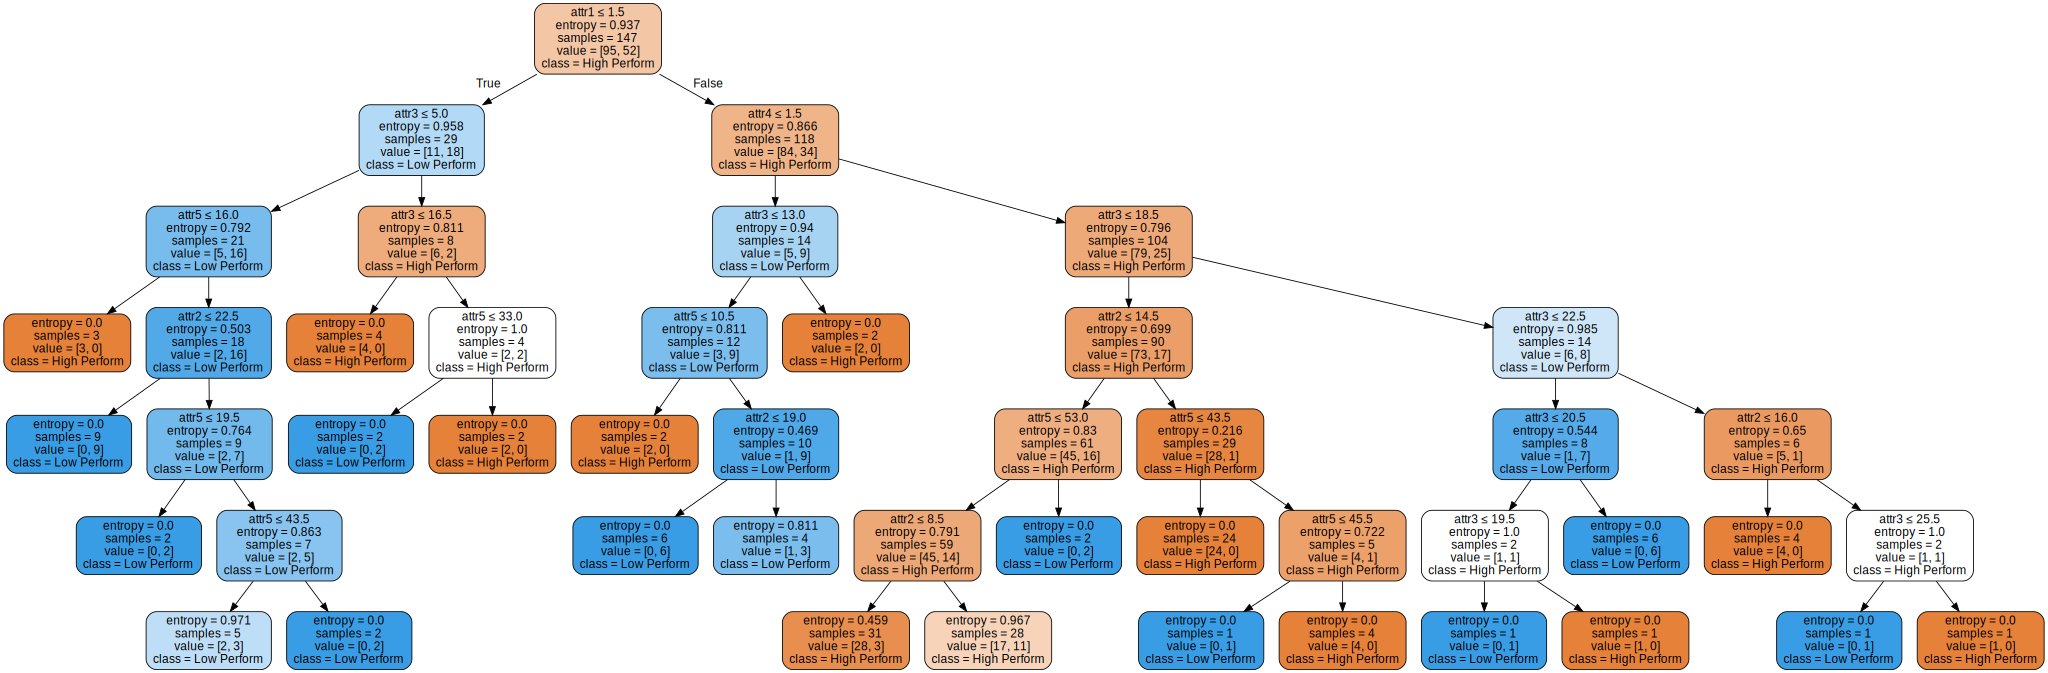

In [118]:
banana = tree.export_graphviz(clf1,
        out_file=None, #image_path("HW1.dot")
        feature_names=list(X.columns),
        class_names=["High Perform","Low Perform"],
        rounded=True,
        filled=True,
        special_characters=True)

graph = graphviz.Source(banana) 
graph

# Question 5

In [119]:
clf2 = LogisticRegression(C=100, penalty='l1', random_state=32)

clf2 = clf2.fit(X,y)

DT_score = cross_val_score(clf2, X=X, y=y, cv=outer_cv, scoring="f1")
print("Nested CV F1-Score: ",DT_score.mean(), " +/- ", DT_score.std())
D2 = cross_val_score(clf2, X=X, y=y, cv=outer_cv, scoring="accuracy")
print("Accuracy",D2.mean(), " +/- ", D2.std())
D3 = cross_val_score(clf2, X=X, y=y, cv=outer_cv, scoring="recall")
print("Recall ",D3.mean(), " +/- ", D3.std())
D4 = cross_val_score(clf2, X=X, y=y, cv=outer_cv, scoring="precision")
print("Precision",D4.mean(), " +/- ", D4.std())

Nested CV F1-Score:  0.4165873015873016  +/-  0.22286032252513924
Accuracy 0.6692261904761905  +/-  0.12431446084722791
Recall  0.35  +/-  0.2176898915634093
Precision 0.5866666666666667  +/-  0.3135637450698378


# Quesiton 6

In [120]:
clf3 = KNeighborsClassifier(n_neighbors=3)

clf3 = clf3.fit(X,y)

DT_score = cross_val_score(clf3, X=X, y=y, cv=outer_cv, scoring="f1")
print("Nested CV F1-Score: ",DT_score.mean(), " +/- ", DT_score.std())
D2 = cross_val_score(clf3, X=X, y=y, cv=outer_cv, scoring="accuracy")
print("Accuracy",D2.mean(), " +/- ", D2.std())
D3 = cross_val_score(clf3, X=X, y=y, cv=outer_cv, scoring="recall")
print("Recall ",D3.mean(), " +/- ", D3.std())
D4 = cross_val_score(clf3, X=X, y=y, cv=outer_cv, scoring="precision")
print("Precision",D4.mean(), " +/- ", D4.std())

Nested CV F1-Score:  0.4031096681096681  +/-  0.15240012782323778
Accuracy 0.5906547619047618  +/-  0.08231436976932727
Recall  0.43  +/-  0.2213343373471204
Precision 0.4178571428571428  +/-  0.10661377302506209


# Question 7

5-fold cross validation:

ROC AUC: 0.68 (+/- 0.13) [Logistic regression]
ROC AUC: 0.68 (+/- 0.26) [Decision tree]
ROC AUC: 0.62 (+/- 0.16) [kNN]


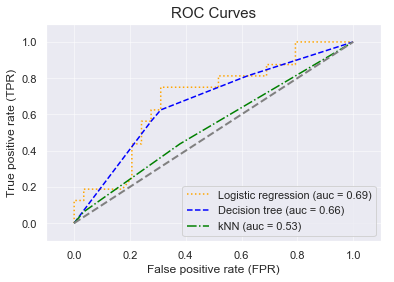

In [121]:
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

# Logistic Regression Classifier
clf1 = LogisticRegression(C=100, penalty='l1', random_state=32)

# Decision Tree Classifier
clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=6,random_state=32)

# kNN Classifier
clf3 = KNeighborsClassifier(n_neighbors=3)

# Label the classifiers
clf_labels = ['Logistic regression', 'Decision tree', 'kNN']
all_clf = [clf1, clf2, clf3]

#################################### Cross - Validation ####################################
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=32)

print('5-fold cross validation:\n')
# Note: We are assuming here that the data is standardized. For the homework, you need to make sure the data is standardized.
for clf, label in zip([clf1, clf2, clf3], clf_labels): #For all classifiers 
    scores = cross_val_score(estimator=clf,  #Estimate AUC based on cross validation
                             X=X, #We are using standardized dataset
                             y=y,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" #Print peformance statistics based on cross-validation
          % (scores.mean(), scores.std(), label))

##################################### Visualization ######################################

colors = [ 'orange', 'blue', 'green']      # Colors for visualization
linestyles = [':', '--', '-.', '-']        # Line styles for visualization
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # Assuming the label of the positive class is 1 and data is normalized
    y_pred = clf.fit(X_train, #use std?
                     y_train).predict_proba(X_test)[:, 1] # Make predictions based on the classifiers
    fpr, tpr, thresholds = roc_curve(y_true=y_test, # Build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                # Compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                         # Plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

plt.title('ROC Curves', loc='center',fontsize=15)
#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()

# Question 8

In [122]:
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=32),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5], 'criterion':['gini','entropy'], 
                              'min_samples_leaf':[1,2,3,4,5],
                              'min_samples_split':[2,3,4,5]}],
                  scoring='f1', # Specifying multiple metrics for evaluation
                  cv=inner_cv,
                  n_jobs=-1)

gs_dt = gs_dt.fit(X,y)
print("\nDecision Tree Parameter Tuning")
print("Non-nested CV F1-Score: ", gs_dt.best_score_)
print("Optimal Parameter: ", gs_dt.best_params_) # Parameter setting that gave the best results on the hold out data.
print("Optimal Estimator: ", gs_dt.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score
nested_score_gs_dt = cross_val_score(gs_dt, X=X, y=y, cv=outer_cv)
print("Nested CV F1-Score: ",nested_score_gs_dt.mean(), " +/- ", nested_score_gs_dt.std())


Decision Tree Parameter Tuning
Non-nested CV F1-Score:  0.5927025355596784
Optimal Parameter:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Optimal Estimator:  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=32, splitter='best')


C:\Users\carlj\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Nested CV F1-Score:  0.49327505827505824  +/-  0.2394150042734044


# Question 9

In [126]:
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

gs_lr = GridSearchCV(estimator=LogisticRegression(random_state=32),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000],
                             'penalty':['l1','l2']}],
                  scoring='f1',
                  cv=inner_cv)

gs_lr = gs_lr.fit(X,y)
print("\n Logistic Regression Parameter Tuning")
print("Non-nested CV F1-Score: ", gs_lr.best_score_)
print("Optimal Parameter: ", gs_lr.best_params_)
print("Optimal Estimator: ", gs_lr.best_estimator_)
nested_score_gs_lr = cross_val_score(gs_lr, X=X, y=y, cv=outer_cv)
print("Nested CV F1-Score:",nested_score_gs_lr.mean(), " +/- ", nested_score_gs_lr.std())


 Logistic Regression Parameter Tuning
Non-nested CV F1-Score:  0.4136810279667423
Optimal Parameter:  {'C': 100, 'penalty': 'l1'}
Optimal Estimator:  LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=32, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Nested CV F1-Score: 0.3971428571428572  +/-  0.22800475389880256


# Question 10

In [127]:
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

# Choosing k for kNN
# Choosing k for kNN AND type of distance
gs_knn = GridSearchCV(estimator=neighbors.KNeighborsClassifier( 
                           metric='minkowski'),
                  param_grid=[{'n_neighbors': [1,3,5,7,9],
                               'weights':['uniform','distance'],'p':[1,2]}],
                  scoring='f1',
                  cv=inner_cv,
                  n_jobs=4)

#print(len(y))
gs_knn = gs_knn.fit(X,y)  #X_std
print("\n kNN Parameter Tuning")
print("Non-nested CV F1-Score: ", gs_knn.best_score_)
print("Optimal Parameter: ", gs_knn.best_params_)
print("Optimal Estimator: ", gs_knn.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score
nested_score_gs_knn = cross_val_score(gs_knn, X=X, y=y, cv=outer_cv)
print("Nested CV F1-Score: ",nested_score_gs_knn.mean(), " +/- ", nested_score_gs_knn.std())


 kNN Parameter Tuning
Non-nested CV F1-Score:  0.6478664192949908
Optimal Parameter:  {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Optimal Estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=1,
                     weights='distance')
Nested CV F1-Score:  0.629126559714795  +/-  0.16411045927564008


# Question 11

# Question 12